# Clustering
This section mention to 
- Index of Data Calculation
- kmeans and fuzzy-c-means clustering

## Introduction 
From now on, all issues will be presented from the perspective of minimizing the cost function. Therefore, the method of solution, the application of data for learning, the learning rule, and the type of model will be explained in the context of the cost function. We will place greater emphasis on the cost function.



## Index of Data Calculation

In the field of data analysis and pattern recognition, the term "Index of Data Calculation" refers to various statistical and mathematical indices used to describe and summarize datasets. These indices help in understanding the Data. Some common indices include the mean, variance, as well as other measures such as central tendencies and support vector data description.One look at the issue is the sample selection that is mentioned below.

 **Instance selection** in machine learning is a technique used to improve the performance and e ciency of a machine learning algorithm. It involves selecting a subset of instances (or data points) from a larger dataset that is representative of the original data but smaller in size. The process of instance selection involves analyzing the dataset and identifying instances that are similar or redundant, and removing them. This reduces the size of the dataset and the complexity of the model. Instance selection techniques can be
 divided into two categories:
 1. Sampling-based techniques: These methods randomly sample a subset of instances from the original dataset. Examples include simple random sampling, other systematic sampling.
 2. Optimization-based techniques: These methods select a subset of instances that maximizes a specific objective function, such as minimizing redundancy or maximizing diversity. Examples include clustering-based techniques, entropy-based techniques, and so on. 

We mentioned the sampling technique in the Bayesian chapter. Now, we will discuss the optimization technique. The cost function for optimization is defined as follows:

$$
\sum_{i=1}^{n}\left( \left\| x_i-\mu \right\|^2 \right)
$$

We define the above relationship more generally as the mean statistic (We found earlier that the above is variance or dispersion) over the error variable's loss function:

$$
E\left\{ l\left( e \right) \right\}
$$

where 𝑒 represents the error, 𝑙 is the loss function, and 𝐸{⋅} denotes the expectation. This is defined as:

where e is error and l is loss function and E{.} is expectation define is,

$$
E\left\{ l\left( e \right) \right\}=\int_{}^{}\left( l\left( e \right)f\left( e \right)de \right)
$$

Of course, we can now abstract this to the following form:

$$
\sum_{i=1}^{n}\left( l(e_i)\right)
$$

where $ e_{i} $ is error of $ i^{th} $ sample. If all data reduce to $ \mu $ then $ e_{i}=x_{i}-\mu $. additionally for the first try, $ l(e_{i})=e_{i}^2 $ representing the same square loss. I solve this over 𝑛 samples, which are logged in the dataset $ D=\{x_1,x_2, ..., x_{n}\} $ as follows,

$$
\mu^{*}=\arg\min_\mu \sum_{i=1}^{n}\left( \left\| x_i-\mu \right\|^2 \right)
$$

After taking the derivative of the above function with respect to 𝜇 and setting it equal to zero, we have:

$$
\mu=\frac{\sum_{}{x{i}}}{n}
$$

In the following section, we emphasize the introduction of some loss functions

## Introduction of loss functions
**Square loss** is introduced first, followed by the introduction of **correntropy loss**.

Correntropy is a localized similarity measure derived from information-theoretic learning
that combines the concepts of information theory and kernel methods.
It is particularly effective in handling non-Gaussian noise and outliers, 
making it a robust alternative to traditional loss functions such as 
mean squared error (MSE) ($ \sum_{i=1}^{n}\left( \left\| x_i-\mu \right\|^2 \right) $).

Given two random variables X and Y , the correntropy between them is defined as:

$$
V_{\sigma}(X, Y) = \mathbb{E} \left[ \kappa_{\sigma}(X - Y) \right] 
$$

Here, $ \kappa_{\sigma} $ is a kernel function, commonly the Gaussian kernel:

$$
 \kappa_{\sigma}(u) = \exp \left( -\frac{u^2}{2\sigma^2} \right) 
$$

In practice, given a set of data points $ \{ (x_i, \mu) \}_{i=1}^N $, the empirical estimate of correntropy is:

$$
\hat{V}_{\sigma}(X, \mu) = \frac{1}{N} \sum_{i=1}^N \exp \left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right) 
$$

Correntropy loss leverages the concept of correntropy to define a loss function that is robust to outliers. For a Index of Data Calculation model, the correntropy loss is:

$$ 
1-\exp(-\left\| x_i-\mu \right\|^2)
$$

_Robustness to Outliers:_ The exponential decay in the Gaussian kernel reduces the influence of large deviations, making the correntropy loss robust to outliers.

## Introducing various loss functions

### 1. Square Loss:
$  \text{Square Loss} = \|x - \mu\|^2 $

### 2. Absolute Loss:
$ \text{Absolute Loss} = |x - \mu| $

### 3. Huber Loss:

$$
\text{Huber Loss} = \begin{cases}
\frac{1}{2}(x - \mu)^2 & \text{if } |x - \mu| \leq \delta \\
\delta(|x - \mu| - \frac{1}{2}\delta) & \text{otherwise}
\end{cases} 
$$

### 4. Pseudo-Huber Loss:

$$
\text{Pseudo-Huber Loss} = \delta^2 \left( \sqrt{1 + \left(\frac{x - \mu}{\delta}\right)^2} - 1 \right) 
$$

### 5. Pinball Loss:

$$
\text{Pinball Loss} = \begin{cases}
\tau (x - \mu) & \text{if } x - \mu \geq 0 \\
(1-\tau) (x - \mu) & \text{if } x - \mu < 0
\end{cases} 
$$

### 6. Correntropy Loss:

$$
 \text{Correntropy Loss} = \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right) 
$$

### 7. Epsilon-Insensitive Loss:

$$
\text{Epsilon-Insensitive Loss} = \max(0, |x - \mu| - \epsilon) 
$$

These formulas summarize the mathematical expressions for each loss function. They describe how each loss quantifies the discrepancy between the sample values x and the index of data $ \mu $. 
Below is a _Python code_ snippet using Matplotlib to visualize various loss functions commonly used in pattern recognition, machine learning and statistics. Each function is defined and plotted with different parameters to demonstrate their characteristics.

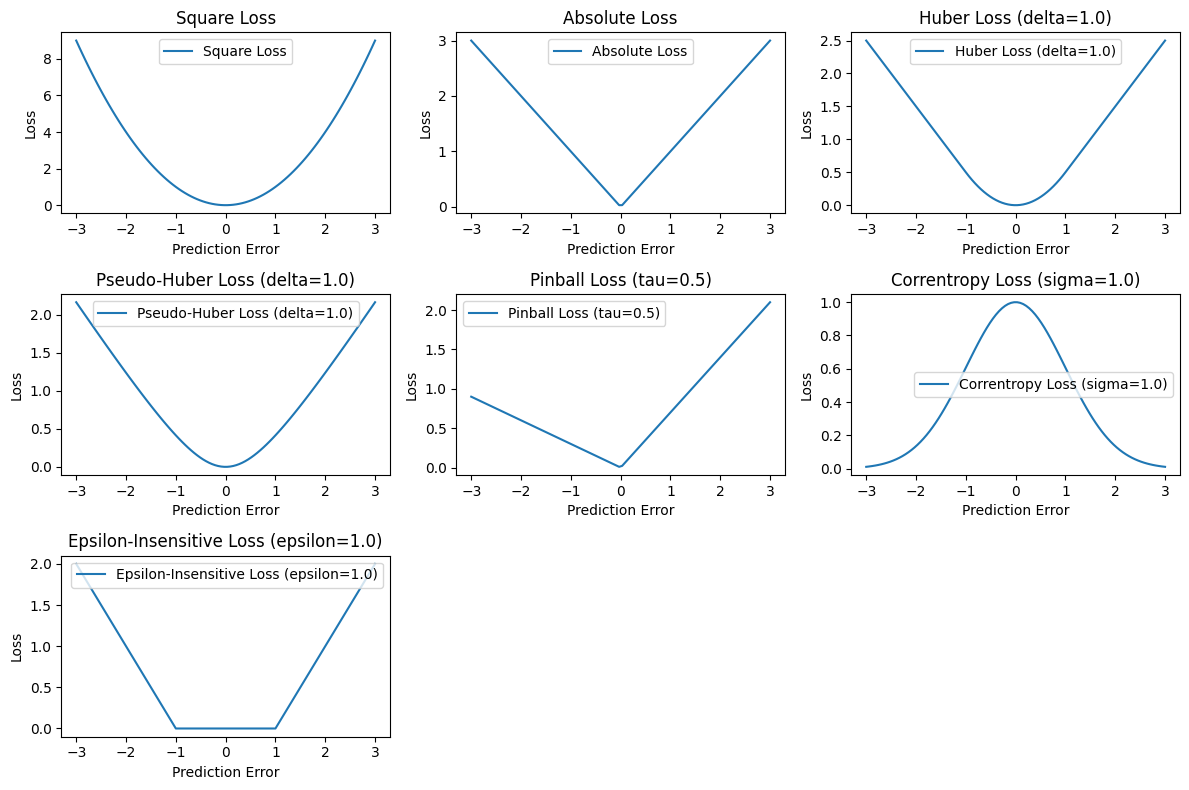

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss functions

def square_loss(y_true, y_pred):
    return np.square(y_true - y_pred)

def absolute_loss(y_true, y_pred):
    return np.abs(y_true - y_pred)

def huber_loss(y_true, y_pred, delta=1.0):
    residual = np.abs(y_true - y_pred)
    return np.where(residual <= delta, 0.5 * np.square(residual), delta * (residual - 0.5 * delta))

def pseudo_huber_loss(y_true, y_pred, delta=1.0):
    residual = y_true - y_pred
    return delta ** 2 * (np.sqrt(1 + (residual / delta) ** 2) - 1)

def pinball_loss(y_true, y_pred, tau=0.5):
    residual = y_true - y_pred
    return np.maximum(tau * residual, (tau - 1) * residual)

def correntropy_loss(y_true, y_pred, sigma=1.0):
    residual = y_true - y_pred
    return np.exp(-0.5 * np.square(residual) / sigma ** 2)

def epsilon_insensitive_loss(y_true, y_pred, epsilon=1.0):
    residual = np.abs(y_true - y_pred)
    return np.maximum(0, residual - epsilon)

# Generate data for plotting
x = np.linspace(-3, 3, 100)
y_true = np.zeros_like(x)  # Assume true values are zeros for simplicity

# Compute losses for each function
loss_functions = {
    'Square Loss': square_loss(y_true, x),
    'Absolute Loss': absolute_loss(y_true, x),
    'Huber Loss (delta=1.0)': huber_loss(y_true, x, delta=1.0),
    'Pseudo-Huber Loss (delta=1.0)': pseudo_huber_loss(y_true, x, delta=1.0),
    'Pinball Loss (tau=0.5)': pinball_loss(y_true, x, tau=0.3),
    'Correntropy Loss (sigma=1.0)': correntropy_loss(y_true, x, sigma=1.0),
    'Epsilon-Insensitive Loss (epsilon=1.0)': epsilon_insensitive_loss(y_true, x, epsilon=1.0)
}

# Plotting
plt.figure(figsize=(12, 8))

for i, (name, loss) in enumerate(loss_functions.items(), start=1):
    plt.subplot(3, 3, i)
    plt.plot(x, loss, label=name)
    plt.title(name)
    plt.xlabel('Prediction Error')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


## Homework_1

Below, you will find Python code specifically for **log_cosh_loss**, **quantile_loss**, and **tukey_loss**. You are tasked with solving the index data calculation from the total of loss functions. Please provide an IPython Notebook (`.ipynb` file) with suitable Markdown for:

a) **Why Different Types of Loss Functions**

b) **Derivation of** $ \mu $ 

c) **Write code on a synthetic 2D dataset, then compare the results using various loss functions. Finally, select a practical dataset like Iris and repeat the process.**


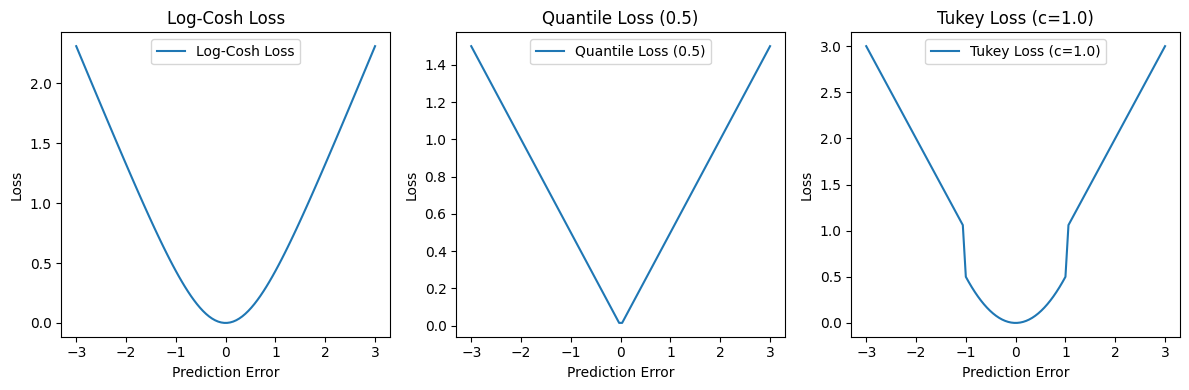

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss functions

def log_cosh_loss(y_true, y_pred):
    residual = y_true - y_pred
    return np.log(np.cosh(residual))

def quantile_loss(y_true, y_pred, quantile=0.5):
    residual = y_true - y_pred
    return np.where(residual >= 0, quantile * residual, (quantile - 1) * residual)

def tukey_loss(y_true, y_pred, c=1.0):
    residual = np.abs(y_true - y_pred)
    return np.where(residual <= c, 0.5 * np.square(residual), c * (0.5 * c + residual - 0.5 * c))

# Generate data for plotting
x = np.linspace(-3, 3, 100)
y_true = np.zeros_like(x)  # Assume true values are zeros for simplicity

# Compute losses for each function
log_cosh = log_cosh_loss(y_true, x)
quantile_05 = quantile_loss(y_true, x, quantile=0.5)
tukey_1 = tukey_loss(y_true, x, c=1.0)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, log_cosh, label='Log-Cosh Loss')
plt.title('Log-Cosh Loss')
plt.xlabel('Prediction Error')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, quantile_05, label='Quantile Loss (0.5)')
plt.title('Quantile Loss (0.5)')
plt.xlabel('Prediction Error')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, tukey_1, label='Tukey Loss (c=1.0)')
plt.title('Tukey Loss (c=1.0)')
plt.xlabel('Prediction Error')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## $\epsilon$-Insensitive Loss for Index of Data

Before leaving this topic, we can obtain the index of data by utilizing the \(\epsilon\)-insensitive loss function. For simplicity, let's assume a 1-dimensional dataset.

$$
\frac{\partial }{\partial \mu} \sum_{i=1}^{n} \max(e_i - \epsilon, 0) = 0
$$

where $ e_i = x_i - \mu $.

Note: $ l(e_i) = \max(e_i - \epsilon, 0) $ is the $\epsilon$-insensitive loss function. For $ e_i - \epsilon $ smaller than 0, the result is zero. Otherwise, it is a linear equation shifted by $\epsilon$.

### Solution

We change the variable by setting $ \max(e_i - \epsilon, 0) = \xi_i $. Due to the max operator, $ \xi_i $ is greater than or equal to both 0 and $ e_i - \epsilon $. Therefore, we have:

$$
\min_\mu \sum_{i=1}^{n} \xi_i 
$$

subject to:
$$ 
\xi_i \ge 0 \quad \text{and} \quad \xi_i \ge e_i - \epsilon 
$$

### Solution Using Linear Programming

To solve the problem using linear programming, we need to set up the optimization problem with the given constraints. The objective is to minimize the sum of the slack variables $ \xi_i $. 

**Convert to Standard Linear Programming Form:**
   - Variables: $ \mu $ and $ \xi_i $ for $ i = 1, \ldots, n $
   - Objective: Minimize $ \sum_{i=1}^{n} \xi_i $
   - Constraints:

     $$
     \xi_i \ge 0
     $$
     
     $$
     \xi_i \ge x_i - \mu - \epsilon
     $$

#### Formulation for Linear Programming Solver:

$$
\begin{aligned}
& \text{minimize} & & \sum_{i=1}^{n} \xi_i \\
& \text{subject to} & & \xi_i \ge 0 \quad \forall i \\
& & & \xi_i \ge x_i - \mu - \epsilon \quad \forall i
\end{aligned}
$$

## Homework_2
- **Write code on a synthetic 2D dataset, then compare the results using various loss functions. Finally, select a practical dataset like Iris and repeat the process.** 
- **Then provide a suitable report for inclusion in an IPython Notebook.**

Guide: You can utilize SciPy for this purpose.

## $\epsilon$-Insensitive Loss for Index of d-dimensional Data
To address the problem of converting a d-dimensional solution into a scalar value and applying the $\epsilon$-Insensitive Loss, we proceed as follows. Define $ e_i=\|x_i-\mu\|^2 $ where $\mu$ represents the centroid or center, and $ x_i $ is the $ i^{th} $ sample. The loss function for each $ i^{th} $ sample is given by $ l(e_i)=\max(e_i - \epsilon, 0) $.
Continuing from the above setup, we aim to find the optimal $\mu$ by minimizing the sum of slack variables $\xi_i$, subject to the constraints:

$$
\frac{\partial }{\partial \mu} \sum_{i=1}^{n} \max(e_i - \epsilon, 0) = 0
$$

$$
\min_\mu \sum_{i=1}^{n} \xi_i 
$$

subject to:

$$ 
\xi_i \ge 0 \quad \text{and} \quad \xi_i \ge e_i - \epsilon 
$$


$$
\xi_i \ge e_i - \epsilon \quad \text{or} \quad \xi_i \ge \|x_i - \mu\|^2 - \epsilon
$$

With careful observation, we understand that for all samples $ x_i $ inside a circle with radius $ \xi_i + \epsilon $. In other words, the samples are enclosed by a circle centered at $ \mu $ with radius $ \xi_i + \epsilon $. The value of $ \xi_i $ must be non-negative ( $ \xi_i \ge 0 $ ). If $ \epsilon $ is small enough, the circle will accurately describe the data.
![SVDD 1](ClusteringImages/circle.png)

In the above figure, we want the radius of the circle to be $ \epsilon $. Some of the samples positioned outside the circle will have a positive slack variable ($ \xi_i \gt 0 $), while the slack variable for the samples inside the circle will be zero. In addition to the above cost function, we add a regularization term in the form of 

$$
\text{E}\left\{l\left( e \right)  \right\} + \lambda \cdot \text{Regularization Term}
$$

where the Regularization Term is $ \epsilon^2 $.

The resulting optimization problem is:

$$
\begin{aligned}
& \text{minimize} & & \sum_{i=1}^{n} \xi_i + \lambda \cdot \epsilon^2 \\
& \text{subject to} & & \xi_i \ge 0 \quad \forall i \\
& & & \|x_i - \mu\|^2 \le \epsilon + \xi_i \quad \forall i
\end{aligned}
$$

This model is called **Support Vector Data Description (SVDD)**. The optimization involves finding a circle that perfectly encloses the main samples, allowing noise to fall outside the circle.

## Some of my papers about **SVDD**

1. Eghdami, M., Yazdi, H. S., & Salehi, N. (2022). Sparsity-aware support vector data description reinforced by expectation maximization. *Expert Systems*, 39(1). First published: 16 August 2021. https://doi.org/10.1111/exsy.12794

2. Forghani, Y., Effati, S., Yazdi, H. S., & Tabrizi, R. S. (2011). Support vector data description by using hyper-ellipse instead of hyper-sphere. *IEEE*. Conference date: 13-14 October 2011. https://doi.org/10.1109/ICCKE.2011.6413318. Published: 17 January 2013.

3. Gorgani, M. E., Moradi, M., & Yazdi, H. S. (2010). An empirical modeling of companies using support vector data description. *International Journal of Trade, Economics and Finance (IJTEF)*, 1(2), 221-224. https://doi.org/10.7763/IJTEF.2010.V1.41

4. Yazdi, H. S., Forghani, Y., & Effati, S. (2012). An extension to fuzzy support vector data description-FSVDD. *Pattern Analysis and Applications (ISI)*, 15(1), 237-247.

5. Moradi, M., Salehi, M., Gorgani, M. E., & Yazdi, H. S. (2013). Financial distress prediction of Iranian companies using data mining techniques. *Business and Economics, Business Management, Management, Organization, Corporate Governance*, 46(1).

6. Yazdi, J. S., Kalantary, F., & Yazdi, H. S. (2012). Investigation on the effect of data imbalance on prediction of liquefaction. *International Journal of Geomechanics*, 13(4). https://doi.org/10.1061/(ASCE)GM.1943-5622.0000217

7. Allahyari, Y., & Yazdi, H. S. (2012). Quasi support vector data description (QSVDD). *International Journal of Signal Processing, Image Processing and Pattern Recognition (IJSIP)*, 5(3), 65-74.

8. Yazdi, J. S., Kalantary, F., & Yazdi, H. S. (2013). Prediction of elastic modulus of concrete using support vector committee method. *Journal of Materials in Civil Engineering*, 25(1), 9-20.

9. Foroughi, H., Yazdi, H. S., Pourreza, H., & Javidi, M. (2008). An eigenspace-based approach for human fall detection using integrated time motion image and multi-class support vector machine. *4th International Conference on Intelligent Computer Communication and Processing*.

10. Haghighi, M. S., Vahedian, A., & Yazdi, H. S. (2011). Creating and measuring diversity in multiple classifier systems using support vector data description. *Applied Soft Computing*, 11(8), 4931-4942.

11. GhasemiGol, M., Monsefi, R., & Yazdi, H. S. (2010). Ellipse support vector data description. *Engineering Applications of Neural Networks: 11th International Conference*.

12. GhasemiGol, M., Sabzekar, M., Monsefi, R., Naghibzadeh, M., & Yazdi, H. S. (2010). A new support vector data description with fuzzy constraints. *2010 International Conference on Intelligent Systems, Modelling and Simulation*.

13. Ghafarian, H., Sadoughi, Y. H., & Allahyari, Y. (2010). Gravity oriented one-class classifier based on support vector data descriptor. *Nashriyyah-I Muhandisi-I Barq Va Muhandisi-I Kampyutar-I Iran, B-Muhandisi*.


## Homework_3
Try SVDD with tukey loss and log-cosh loss